In [1]:
from mpl_toolkits import mplot3d

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## 3D test

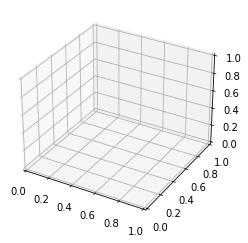

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

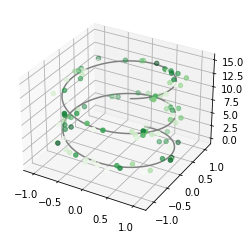

In [4]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
val_data = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=val_data, cmap='Greens')

## extract data (1986-1991 by average value)

In [5]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from autots import AutoTS
import pathlib
import json

In [6]:
gelman_data = pd.read_excel("../../result(new)/joined_well_data.xlsx")
gelman_data.head(5)

,Unnamed: 0,Bore,Name,Depth1,Depth2,SampleDate,Value,Comment,Enabled,Easting,...,utm_datum,utm_zone,utm_x,utm_y,utm_unit,pj4_x,pj4_y,pj4_paramstr,lat,lon
0,0,1021 Westview Way,1-4 Dioxane,260.0,268.0,2019-05-08,0.5,EGLE Lab,False,13274717.9,...,22,12,0,0,1,0,0,NaN,42.269732,-83.807344
1,1,1024 Westview Way,1-4 Dioxane,-9999.0,-9999.0,2019-05-08,0.5,EGLE Lab,False,13274221.6,...,22,12,0,0,1,0,0,NaN,42.269808,-83.809177
2,2,1049 Westview Way,1-4 Dioxane,272.0,280.0,2019-05-08,0.5,EGLE Lab,False,13274722.1,...,22,12,0,0,1,0,0,NaN,42.269390,-83.807331
3,3,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-03-27,0.5,NaN,False,13269250.0,...,22,12,0,0,1,0,0,NaN,42.285462,-83.827411
4,4,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-05-28,0.5,NaN,False,13269250.0,...,22,12,0,0,1,0,0,NaN,42.285462,-83.827411


In [7]:
gelman_data.columns

Index(['Unnamed: 0', 'Bore', 'Name', 'Depth1', 'Depth2', 'SampleDate', 'Value',
       'Comment', 'Enabled', 'Easting', 'Northing', 'Elevation', 'TotalDepth',
       'CollarElevation', 'Comments', 'GEIcon', 'Color', 'SymbolTypeId',
       'NeedXYZCalc', 'dd_lon', 'dd_lat', 'lcs_x', 'lcs_y', 'lcs_unit',
       'pls_meridian', 'pls_range', 'pls_township', 'pls_section',
       'pls_offset_based', 'pls_x_offset', 'pls_y_offset', 'pls_fwl',
       'pls_fsl', 'pls_description', 'spc_zone', 'spc_x', 'spc_y', 'spc_unit',
       'utm_datum', 'utm_zone', 'utm_x', 'utm_y', 'utm_unit', 'pj4_x', 'pj4_y',
       'pj4_paramstr', 'lat', 'lon'],
      dtype='object')

### grouped by well name and filter by time period


In [8]:

zdata = []
val_data = []
xdata = []
ydata = []

grouped = gelman_data.groupby('Bore')
count = 0
start_date = datetime.datetime(1986, 1, 1)
end_date = datetime.datetime(1991, 12, 31)
for name, group in grouped:
    count += 1

    group.loc[:, 'ds'] = pd.to_datetime(group['SampleDate'])
    tmp = []
    for index, row in group.iterrows():
        ds = row['ds']
        if start_date <= ds <= end_date:
            tmp.append(row)
    df = pd.DataFrame(tmp)
    if len(tmp) > 0:
        mean_value = df["Value"].mean()
        xdata.append(pd.to_numeric(df['Easting'],errors ='ignore').iloc[0])
        ydata.append(pd.to_numeric(df['Northing'],errors ='ignore').iloc[0])
        depth = pd.to_numeric(df['Depth1'],errors ='ignore').iloc[0]
        if depth < 0:
            depth = 0
        zdata.append(-depth)
        val_data.append(mean_value)


## scatter3D test

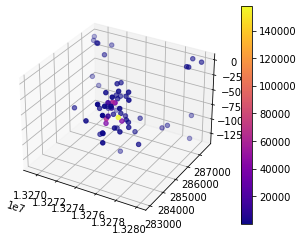

In [9]:

import pylab as plt


fig = plt.figure()
ax = plt.axes(projection='3d')
p = ax.scatter3D(xdata, ydata, zdata, c=val_data, cmap='plasma')
fig.colorbar(p)

## plot surface with colormap


C:\Users\89718\AppData\Local\Temp/ipykernel_17484/3414764580.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


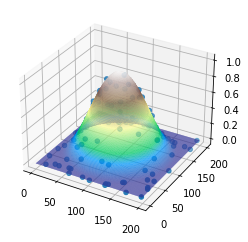

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.arange(200)
y = np.arange(200)
x, y = np.meshgrid(x, y)
z = np.zeros((200, 200))

# Create index arrays.
I, J = np.meshgrid(np.arange(200), np.arange(200))

# Calculate distance of all points to center.
dist = np.sqrt((I - 100)**2 + (J - 100)**2)

# Create the peak.
radius = 50
height = 1
curve = np.linspace(0, np.pi, radius*2)
z_peak = [(np.cos(i) + 1) * height / 2 for i in curve]
for cr, h in enumerate(z_peak):
    z = np.where(dist < cr, z, h)

ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidths=0, cmap='terrain')

# Generate points to represent population.
x_ = np.random.randint(0, 200, size=100)
y_ = np.random.randint(0, 200, size=100)
z_ = []
for x, y in zip(x_, y_):
    z_.append(z[x, y])
points = ax.scatter(x_, y_, z_)


## 3d interpolation with elevation(plot_wireframe)

In [11]:
from scipy.interpolate import griddata as gd

from pykrige.ok import OrdinaryKriging

import matplotlib.animation as animation

In [12]:
t = []
for i in range(len(xdata)):
    tmp = [xdata[i], ydata[i], zdata[i]]
    t.append(tmp)

new_top = np.asarray(t)

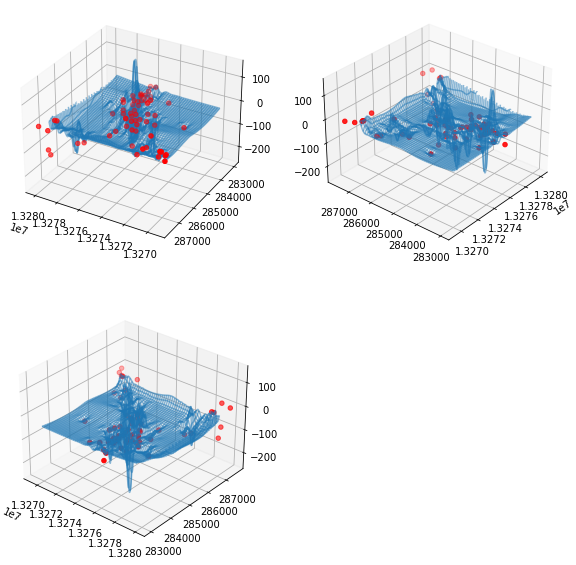

In [13]:
interpolationmethod = 'cubic'
top = new_top

extrapolation_interval = 30

def interpolation(d):
    grid_x, grid_y = np.mgrid[13270000:13280000:500j, 283000:287000:500j]
    grid_z = gd(d[:, :2], d[:, 2], (grid_x, grid_y),
                method=interpolationmethod)
    return grid_x, grid_y, grid_z

def extrapolation(data, extrapolation_spots, method='kriging'):
    if method == 'kriging':
        xx, yy, zz, ss = kriging(data, extrapolation_spots)

        new_points = np.zeros((len(yy) * len(zz), 3))
        count = 0
        for i in range(len(xx)):
            for j in range(len(yy)):
                new_points[count, 0] = xx[i]
                new_points[count, 1] = yy[j]
                new_points[count, 2] = zz[i, j]
                count += 1
        combined = np.concatenate((data, new_points))
        return combined

def kriging(k_data, extrapolation_spots):
    # grid_x = np.arange(0.0, 200, 10)
    grid_x = np.arange(13270000.0, 13280000.0, 500)
    # grid_y = np.arange(0.0, 200, 10)
    grid_y = np.arange(283000.0, 287000, 200)
    OK = OrdinaryKriging(k_data[:, 0], k_data[:, 1], k_data[:, 2], variogram_model='spherical',
                                 verbose=False, nlags=100)

    z_res, ss = OK.execute('grid', grid_x, grid_y)
    return grid_x, grid_y, z_res, ss

def kriging_analysis(extrapolation_spots_t):
    top_extra = extrapolation(top, extrapolation_spots_t, method='kriging')
    gridx_top, gridy_top, gridz_top = interpolation(top_extra)
    plot(top, gridx_top, gridy_top, gridz_top, method='snaps',
            title='_top_kriging')

def plot(data, gridx, gridy, gridz, method='rotate', title='nearest', both=False):
    def update(i):
        ax.view_init(azim=i)
        return ax,

    if method == 'rotate':
        fig = plt.figure()
        ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d')

        ax.plot_wireframe(gridx, gridy, gridz, alpha=0.5)
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='red')

        animation.FuncAnimation(fig, update, np.arange(360 * 5), interval=1)
        plt.show()

    elif method== 'snaps':
        fig = plt.figure(figsize=(10, 10))
        angles = [45, 120, 220, 310]

        if both:
            for i in range(4):
                ax = fig.add_subplot(2, 2, i, projection='3d')
                ax.plot_wireframe(gridx[0], gridy[0], gridz[0], alpha=0.5)
                ax.plot_wireframe(gridx[1], gridy[1], gridz[1], alpha=0.5)
                ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='red')
                ax.view_init(azim=angles[i])
        else:
            for i in range(1, 4):
                ax = fig.add_subplot(2, 2, i, projection='3d')
                ax.plot_wireframe(gridx, gridy, gridz, alpha=0.5)
                ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='red')
                ax.view_init(azim=angles[i])

        plt.savefig('snaps_{}.png'.format(title))

def get_plane(xl, xu, yl, yu, i):
    xx = np.arange(xl, xu, i)
    yy = np.arange(yl, yu, i)
    extrapolation_spots_res = np.zeros((len(xx) * len(yy), 2))
    count = 0
    for i in xx:
        for j in yy:
            extrapolation_spots_res[count, 0] = i
            extrapolation_spots_res[count, 1] = j
            count += 1
    return extrapolation_spots_res

extrapolation_spots = get_plane(13270000.0, 13280000.0, 283000.0, 287000.0, extrapolation_interval)

kriging_analysis(extrapolation_spots)

## 3d interpolation with colormap(value)
ref:
[colormap-as-4th-dimension](https://stackoverflow.com/questions/32461452/python-plot-3d-surface-with-colormap-as-4th-dimension-function-of-x-y-z)


### using x as 4th dimension

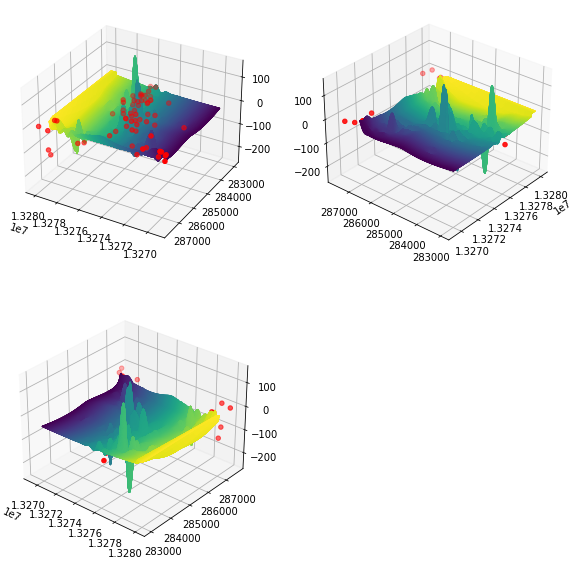

In [46]:
from matplotlib import cm
interpolationmethod = 'cubic'
top = new_top

extrapolation_interval = 30

def interpolation(d):
    grid_x, grid_y = np.mgrid[13270000:13280000:500j, 283000:287000:500j]
    grid_z = gd(d[:, :2], d[:, 2], (grid_x, grid_y),
                method=interpolationmethod)
    return grid_x, grid_y, grid_z

def extrapolation(data, extrapolation_spots, method='kriging'):
    if method == 'kriging':
        xx, yy, zz, ss = kriging(data, extrapolation_spots)

        new_points = np.zeros((len(yy) * len(zz), 3))
        count = 0
        for i in range(len(xx)):
            for j in range(len(yy)):
                new_points[count, 0] = xx[i]
                new_points[count, 1] = yy[j]
                new_points[count, 2] = zz[i, j]
                count += 1
        combined = np.concatenate((data, new_points))
        return combined

def kriging(k_data, extrapolation_spots):
    # grid_x = np.arange(0.0, 200, 10)
    grid_x = np.arange(13270000.0, 13280000.0, 500)
    # grid_y = np.arange(0.0, 200, 10)
    grid_y = np.arange(283000.0, 287000, 200)
    OK = OrdinaryKriging(k_data[:, 0], k_data[:, 1], k_data[:, 2], variogram_model='spherical',
                                 verbose=False, nlags=100)

    z_res, ss = OK.execute('grid', grid_x, grid_y)
    return grid_x, grid_y, z_res, ss

def kriging_analysis(extrapolation_spots_t):
    top_extra = extrapolation(top, extrapolation_spots_t, method='kriging')
    gridx_top, gridy_top, gridz_top = interpolation(top_extra)
    plot(top, gridx_top, gridy_top, gridz_top, method='snaps',
            title='_top_kriging')

def plot(data, gridx, gridy, gridz, method='rotate', title='nearest', both=False):
    fig = plt.figure(figsize=(10, 10))
    angles = [45, 120, 220, 310]

    for i in range(1, 4):
        ax = fig.add_subplot(2, 2, i, projection='3d')
        # print("x", gridx.shape)
        # print("y", gridy.shape)
        # print("z", gridz.shape)

        gridz_ = np.nan_to_num(gridz)

        # print(gridx)
        # print(gridy)
        # print(gridz)



        norm = plt.Normalize(gridx.min(), gridx.max())
        colors = cm.viridis(norm(gridx))
        rcount, ccount, _ = colors.shape

        # print(colors)
        #
        # print("colors", colors.shape)

        ax.plot_surface(gridx, gridy, gridz_,
                   rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)

        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='red')
        ax.view_init(azim=angles[i])

    plt.savefig('snaps_{}.png'.format(title))

def get_plane(xl, xu, yl, yu, i):
    xx = np.arange(xl, xu, i)
    yy = np.arange(yl, yu, i)
    extrapolation_spots_res = np.zeros((len(xx) * len(yy), 2))
    count = 0
    for i in xx:
        for j in yy:
            extrapolation_spots_res[count, 0] = i
            extrapolation_spots_res[count, 1] = j
            count += 1
    return extrapolation_spots_res

extrapolation_spots = get_plane(13270000.0, 13280000.0, 283000.0, 287000.0, extrapolation_interval)

kriging_analysis(extrapolation_spots)

### using value as 4th dimension

In [47]:
t = []
for i in range(len(xdata)):
    tmp = [xdata[i], ydata[i], val_data[i]]
    t.append(tmp)

value_top = np.asarray(t)

[[2.38904276e+03 2.37416866e+03 2.35930132e+03 ... 7.88546958e+00
  7.92471837e+00 7.89895927e+00]
 [2.38066965e+03 2.36560771e+03 2.35059134e+03 ... 7.43791336e+00
  7.50704681e+00 7.43596883e+00]
 [2.37225051e+03 2.35704607e+03 2.34187303e+03 ... 6.88477005e+00
  6.96875779e+00 6.76560863e+00]
 ...
 [7.05430961e+03 7.04375483e+03 7.03318732e+03 ... 1.54206225e+01
  1.53306855e+01 1.52626230e+01]
 [7.05380366e+03 7.04328812e+03 7.03299924e+03 ... 1.70691495e+01
  1.69383095e+01 1.68349442e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.93796040e+01
  1.91615876e+01 1.89965141e+01]]
-864.2023817886279
159445.9074812608
[[2.38904276e+03 2.37416866e+03 2.35930132e+03 ... 7.88546958e+00
  7.92471837e+00 7.89895927e+00]
 [2.38066965e+03 2.36560771e+03 2.35059134e+03 ... 7.43791336e+00
  7.50704681e+00 7.43596883e+00]
 [2.37225051e+03 2.35704607e+03 2.34187303e+03 ... 6.88477005e+00
  6.96875779e+00 6.76560863e+00]
 ...
 [7.05430961e+03 7.04375483e+03 7.03318732e+03 ... 1.54206225

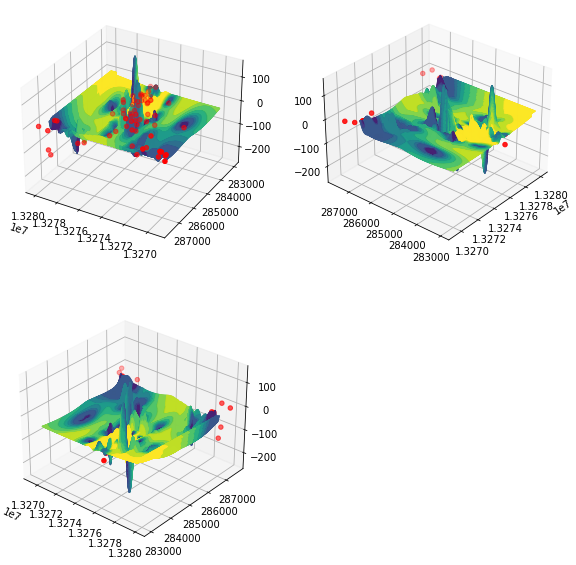

In [70]:
interpolationmethod = 'cubic'
top = new_top

extrapolation_interval = 30

def interpolation(d):
    grid_x, grid_y = np.mgrid[13270000:13280000:500j, 283000:287000:500j]
    grid_z = gd(d[:, :2], d[:, 2], (grid_x, grid_y), method=interpolationmethod)
    return grid_x, grid_y, grid_z

def nearest_neighbor_interpolation(data, x, y, p=0.5):
    """
    Nearest Neighbor Weighted Interpolation
    http://paulbourke.net/miscellaneous/interpolation/
    http://en.wikipedia.org/wiki/Inverse_distance_weighting

    :param data: numpy.ndarray
        [[float, float, float], ...]
    :param p: float=0.5
        importance of distant samples
    :return: interpolated data
    """
    n = len(data)
    vals = np.zeros((n, 2), dtype=np.float64)
    distance = lambda x1, x2, y1, y2: (x2 - x1)**2 + (y2 - y1)**2
    for i in range(n):
        vals[i, 0] = data[i, 2] / (distance(data[i, 0], x, data[i, 1], y))**p
        vals[i, 1] = 1          / (distance(data[i, 0], x, data[i, 1], y))**p
    z = np.sum(vals[:, 0]) / np.sum(vals[:, 1])
    return z

def extrapolation(data, extrapolation_spots, method='nearest'):
    if method == 'kriging':
        xx, yy, zz, ss = kriging(data)

        new_points = np.zeros((len(yy) * len(zz), 3))
        count = 0
        for i in range(len(xx)):
            for j in range(len(yy)):
                new_points[count, 0] = xx[i]
                new_points[count, 1] = yy[j]
                new_points[count, 2] = zz[i, j]
                count += 1
        combined = np.concatenate((data, new_points))
        return combined

    if method == 'nearest':
        new_points = np.zeros((len(extrapolation_spots), 3))
        new_points[:, 0] = extrapolation_spots[:, 0]
        new_points[:, 1] = extrapolation_spots[:, 1]
        for i in range(len(extrapolation_spots)):
            new_points[i, 2] = nearest_neighbor_interpolation(data,
                                    extrapolation_spots[i, 0],
                                    extrapolation_spots[i, 1], p=2)
        combined = np.concatenate((data, new_points))
        return combined

def kriging(k_data):
    # grid_x = np.arange(0.0, 200, 10)
    grid_x = np.arange(13270000.0, 13280000.0, 500)
    # grid_y = np.arange(0.0, 200, 10)
    grid_y = np.arange(283000.0, 287000, 200)
    OK = OrdinaryKriging(k_data[:, 0], k_data[:, 1], k_data[:, 2], variogram_model='spherical',
                                 verbose=False, nlags=100)

    z_res, ss = OK.execute('grid', grid_x, grid_y)
    return grid_x, grid_y, z_res, ss

def kriging_analysis(extrapolation_spots_t):
    top_extra = extrapolation(top, extrapolation_spots_t, method='kriging')
    gridx_top, gridy_top, gridz_top = interpolation(top_extra)

    top_value_extra = extrapolation(value_top, extrapolation_spots_t, method='nearest')
    gridx_v_top, gridy_v_top, gridz_v_top = interpolation(top_value_extra)

    plot(top, gridx_top, gridy_top, gridz_top, gridz_v_top ,method='snaps',
            title='_top_kriging')

def plot(data, gridx, gridy, gridz, grid_value_z, method='rotate', title='nearest', both=False):
    fig = plt.figure(figsize=(10, 10))
    angles = [45, 120, 220, 310]

    for i in range(1, 4):
        ax = fig.add_subplot(2, 2, i, projection='3d')
        gridz_ = np.nan_to_num(gridz)

        grid_value_z = np.nan_to_num(grid_value_z)

        print(grid_value_z)
        print(grid_value_z.min())
        print(grid_value_z.max())

        bounds = [grid_value_z.min(), 0,4,
                  7.2,85,
                  150,280,500,
                  1000,1900,3000,5000, grid_value_z.max()]
        norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)
        # norm = matplotlib.colors.LogNorm(grid_value_z.min(), grid_value_z.max())
        colors = cm.viridis(norm(grid_value_z))
        rcount, ccount, _ = colors.shape
        ax.plot_surface(gridx, gridy, gridz_,
                   rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False, alpha = 0.5)

        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='red')
        ax.view_init(azim=angles[i])

    plt.savefig('snaps_{}.png'.format(title))

def get_plane(xl, xu, yl, yu, i):
    xx = np.arange(xl, xu, i)
    yy = np.arange(yl, yu, i)
    extrapolation_spots_res = np.zeros((len(xx) * len(yy), 2))
    count = 0
    for i in xx:
        for j in yy:
            extrapolation_spots_res[count, 0] = i
            extrapolation_spots_res[count, 1] = j
            count += 1
    return extrapolation_spots_res

extrapolation_spots = get_plane(13270000.0, 13280000.0, 283000.0, 287000.0, extrapolation_interval)

kriging_analysis(extrapolation_spots)